In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#IMPPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

***LOADING DATA***

In [4]:
data_train=pd.read_csv('/content/drive/MyDrive/ML bootcamp/Copy of linear_train.csv')
data_test=pd.read_csv('/content/drive/MyDrive/ML bootcamp/Copy of linear_test_data (1).csv')
data_train

,Unnamed: 0,A,B,C,D,E,F,G,H,I,...,L,M,N,O,P,Q,R,S,T,label
0,0,-284.685568,284.567363,18.462706,0.012380,-52.394580,-0.942413,6.746190,19.595626,554.989342,...,33.451992,-9.171214,528.122484,-1959.593876,-47.348529,767.129260,-12.001084,83.978055,737.317448,-218.016231
1,1,-428.480005,307.240676,22.632897,-0.099657,6.294685,30.440746,95.919775,-52.450992,-872.531179,...,14.848331,-33.556867,-569.261772,-2014.463089,20.042132,769.298704,18.057370,-55.521630,775.407458,154.140849
2,2,-25.800879,237.433758,-0.467505,-0.115813,-7.837079,21.598922,158.095089,2.554397,136.298244,...,-12.662449,28.956309,1069.504591,-1932.524770,18.419684,781.523541,70.652625,302.121708,810.402101,394.849701
3,3,-292.645787,249.444200,-3.661449,0.020113,-4.273514,21.421400,71.012817,49.089192,-444.041731,...,-1.741291,-65.225030,-35.017662,-1987.750883,32.222111,774.167118,-38.784611,-171.210149,793.225247,-83.932183
4,4,-264.114362,259.031693,-17.772049,-0.108774,6.512923,13.657296,78.446286,20.942401,-257.340694,...,17.309833,17.309769,-1086.046476,-2040.302324,22.900939,809.692581,-32.675473,104.996827,841.923375,-120.640357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,-85.031310,222.790990,0.095627,0.204109,-52.848040,38.821311,23.198112,-21.586558,-424.165189,...,28.318193,12.697718,-655.264783,-2018.763239,-29.192308,689.387739,-32.005704,-8.231327,819.069926,-516.512029
49996,49996,137.926149,290.653724,50.544278,-0.083692,5.798451,13.489033,71.397422,-26.856339,344.026419,...,-19.500872,8.418415,636.835571,-1954.158221,-11.425503,748.544791,16.364545,-139.060872,742.606658,-116.725300
49997,49997,-254.691431,256.793278,23.197453,-0.134180,-18.699290,18.167020,99.842281,-34.969292,-470.061887,...,4.196743,-49.306852,246.439298,-1973.678035,31.945661,791.303799,-23.078521,188.422643,748.559054,-3.444489
49998,49998,710.054262,257.565009,-16.335601,-0.067519,35.120422,20.832651,56.636551,34.805563,116.608021,...,-24.301008,-11.243710,728.794707,-1949.560265,23.984814,795.210523,15.238836,89.527817,757.012968,445.356781


**FEATURE SCALING**

In [5]:
def normalize_data(x):
 mu=np.mean(x,axis=0)
 sigma=np.std(x,axis=0)
 x=(x-mu)/sigma
 return x
#CREATE A FUNCTION TO APPLY Z-SCORE NORMALIZATION


In [6]:
X=data_train.to_numpy() #CONVERTING DATA TO NUMPY ARRAY
m=X.shape[0]
n=(X.shape[1]-1)
X_Train=X[:,1:n] #APPLYING SLICING ON DATA TO SEPRATE IT FROM LABEL
print(X_Train.shape)
print(X_Train)
X_Train=normalize_data(X_Train) #NORMALIZING DATA / FEATURE SCALING
print(X_Train)
Y_Train=X[:,n] #Y_Train will become a 1d matrix 
Y_Train=Y_Train.reshape(m,1) #but we need a 2 d matrix of order M*1  M IS NO. OF TRAINING EXAMPLES 
print(Y_Train.shape)
print(Y_Train)



(50000, 20)
[[-2.84685568e+02  2.84567363e+02  1.84627063e+01 ... -1.20010842e+01
   8.39780551e+01  7.37317448e+02]
 [-4.28480005e+02  3.07240676e+02  2.26328973e+01 ...  1.80573704e+01
  -5.55216301e+01  7.75407458e+02]
 [-2.58008787e+01  2.37433758e+02 -4.67504670e-01 ...  7.06526251e+01
   3.02121708e+02  8.10402101e+02]
 ...
 [-2.54691431e+02  2.56793278e+02  2.31974534e+01 ... -2.30785214e+01
   1.88422643e+02  7.48559054e+02]
 [ 7.10054262e+02  2.57565009e+02 -1.63356012e+01 ...  1.52388356e+01
   8.95278167e+01  7.57012968e+02]
 [-2.69821407e+02  2.81097270e+02 -3.05824270e+01 ...  8.34763802e+00
   1.44270028e+02  7.32900535e+02]]
[[-0.99722997  1.20760112  0.64714173 ... -0.42356685  0.14706176
  -1.81833211]
 [-1.50051622  2.00042615  0.79297113 ...  0.62858483 -0.831581
  -0.48062945]
 [-0.09112324 -0.44053485 -0.01483786 ...  2.46960382  1.67742154
   0.74836542]
 ...
 [-0.89224929  0.2364157   0.81271337 ... -0.81131613  0.87977983
  -1.42353235]
 [ 2.48439907  0.26340108

In [7]:
X_Test=data_test.to_numpy()
m=X_Test.shape[0]
n=(X_Test.shape[1])
X_T_Test=X_Test[:,1:n]  # ASSEMBLING TEST DATA TO PREDICT LABELS FOR TEST DATA
print(X_T_Test.shape)
print(X_T_Test)
X_T_Test=normalize_data(X_T_Test)
print(X_T_Test)


(20000, 20)
[[ 146.79064077  223.71180565   -0.88137077 ...    4.88054597
   125.78555074  800.20477227]
 [  33.25365297  285.93522871   -3.35261115 ...   30.74826423
   130.8324214   736.11914334]
 [ 180.53179872  208.42034341    9.84618777 ...  -44.22657541
     7.93928048  833.65673771]
 ...
 [-208.06214994  218.78847063   -9.15764925 ...   -5.94135997
   -67.82122337  811.02237566]
 [ 246.77261619  229.34815412   54.29351768 ...   67.34885785
   363.34733553  748.9426883 ]
 [ 151.89825368  261.23698597  -85.46693489 ...    8.9994506
   -22.70322019  790.46707145]]
[[ 0.51491347 -0.92095674 -0.03073957 ...  0.17851954  0.43144809
   0.39667813]
 [ 0.11564678  1.25776953 -0.11778156 ...  1.08050841  0.46667418
  -1.83727895]
 [ 0.63356837 -1.45638068  0.34710633 ... -1.53381071 -0.39109395
   1.56277818]
 ...
 [-0.73296973 -1.09334519 -0.32224652 ... -0.19883259 -0.91988624
   0.77376832]
 [ 0.8665123  -0.72360243  1.9126295  ...  2.35674497  2.08957909
  -1.39026377]
 [ 0.53287501  

DEFINING CLASS **LINEAR REGRESSION**

In [8]:
class LinearRegression:
  def costPlot(cost, iters):
        #ITERS IS NO. OF ITERATIONS 
        plt.plot(np.arange(iters),cost,'-b')
        plt.xlabel('Number of iterations')    #CREATING A FUNCTION TO PLOT COST VS ITERATIONS GRAPH
        plt.ylabel('Cost')
        plt.show()

  def Train_data(x,y,learning_rate,no_of_iterations):
    m=x.shape[0]
    n=x.shape[1]
    w=(np.zeros((n,1))) #CREATING A WEIGHT MATRIX OF ORDER N*1 WHERE N IS NO. OF FEATUERS
    b=0
   
    cost=[]     # for keeping cost data reserved USED TO PLOT COST VS ITERATIONS GRAPH
    for i in range(no_of_iterations):
      y_pred=np.dot(x,w)+b     # MODEL TO PREDICT DATA
      cost_i = (1/(2*m))*np.sum(np.square(y_pred - y))  #DEFINING MEAN SQUARED COST FUNCTION
      a=np.array(y_pred - y)
      a1 = a.transpose()   #TAKING TRANSPOSE SO THAT NEXT OPERATION CAN BE WHICH IS DOT OF M*N AND A I*M MATRIX 
      derivative_w=(1/m)*np.dot(a1,x) #DERIVATIVE OF COST FUNCTION WITH RESPECT TO WEIGHTS
      derivative_w_T=derivative_w.transpose()  #TAKING TRANSPOSE TO MAKE IT IS OF SAME SHAPE AS W 
      derivative_b=(1/m)*np.sum(y_pred-y)
      w=w-learning_rate*derivative_w_T  #UPDATING W AND B TO APPLY GRADIENT DESCENT
      b=b-learning_rate*derivative_b
      cost.append(cost_i) #APPENDING COST TO COST ARRAY
      if(i%math.ceil(no_of_iterations/10) == 0):
            print('Cost is:',cost_i,'after ',i,'iterations') #PRINT COST VALUE VS ITERATIONS
    return w,b,cost
  def predict(X,w,b):
        return X.dot(w)+b #DEFINING A FUNCTION TO PREDICT VALUES
  def r2_score(yp,y):
        ymean=np.mean(y)
        ssr=np.sum(np.square(yp-y))
        ssm=np.sum(np.square(y-ymean))# DEFINING A FUNCTION TO CALCULATE R2 score
        r2=1-(ssr/ssm)
        return r2



In [9]:
learning_rate=0.1 #CALLING FUNCTION TO TARIN ON THIS DATA
iterations=1000
w,b,cost1=LinearRegression.Train_data(X_Train,Y_Train,learning_rate,iterations)

Cost is: 30357.23198081161 after  0 iterations
Cost is: 4769.768720624715 after  100 iterations
Cost is: 4769.76870276422 after  200 iterations
Cost is: 4769.768702764219 after  300 iterations
Cost is: 4769.768702764219 after  400 iterations
Cost is: 4769.768702764219 after  500 iterations
Cost is: 4769.768702764219 after  600 iterations
Cost is: 4769.768702764219 after  700 iterations
Cost is: 4769.768702764219 after  800 iterations
Cost is: 4769.768702764219 after  900 iterations


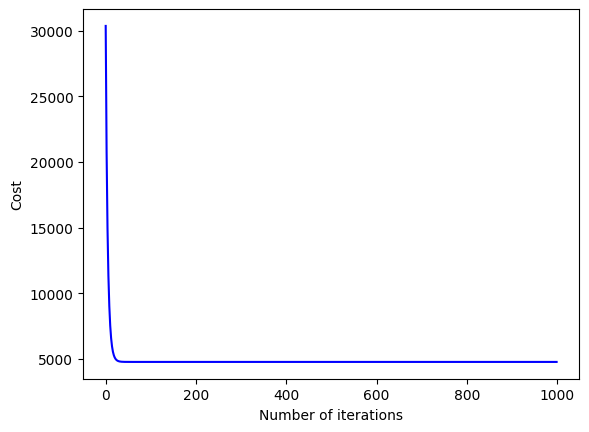

In [10]:
LinearRegression.costPlot(cost1,1000)

In [11]:
predictions=LinearRegression.predict(X_T_Test,w,b)
print(predictions)
prediction = pd.DataFrame(predictions, columns=['Y PREDICTED'])
print(prediction)
prediction=prediction.to_csv('y_prediction.csv')

[[  10.1865723 ]
 [ 169.82794939]
 [  74.44736043]
 ...
 [  95.41054356]
 [ 309.74393783]
 [-164.81309342]]
       Y PREDICTED
0        10.186572
1       169.827949
2        74.447360
3       -99.386349
4        30.838832
...            ...
19995   153.819301
19996    42.695464
19997    95.410544
19998   309.743938
19999  -164.813093

[20000 rows x 1 columns]


In [12]:
ypredicted=pd.read_csv('/content/drive/MyDrive/dataset/Y_Predicted_Linear_Regression.csv')
ypredicted

,ids,Y PREDICTED
0,96396,10.186572
1,80166,169.827949
2,20516,74.447360
3,88881,-99.386349
4,69115,30.838832
...,...,...
19995,59011,153.819301
19996,66308,42.695464
19997,99637,95.410544
19998,84616,309.743938
